# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

## Описание проекта

Анализ рынка общественного питания в Москве. Анализ расположения объектов общественного питания Москвы с применением сторонних источников данных. Визуализация результатов анализа с использованием библиотек seaborn и plotly. 

## План проекта

[1. Загрузка данных и подготовка их к анализу.](#11)
      
[1.1. Загрузка данных проекта о заведениях общественного питания Москвы.](#12)      
[1.2. Загрузка данных из сторонних источников](#13)     

[2. Анализ данных.](#0)   
     
[2.1. Исследование соотношения видов объектов общественного питания по количеству. Построение графика.](#1)  
[2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.](#2)    
[2.3. Определение вида объекта общественного питания, для которого характерно сетевое распространение.](#3)       
[2.4. Определение характерных черт сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.](#4)       
[2.5. Определение среднего количества посадочных мест для каждого вида объекта общественного питания. Определение вида объекта общественного питания с наибольшим в среднем количеством посадочных мест. Построение графика.](#5)      
[2.6. Выделение в отдельный столбец информации об улице из столбца address.](#6)       
[2.7. Построение графика топ-10 улиц по количеству объектов общественного питания. Определение района Москвы, с использованием внешней информации, в котором находятся эти улицы.](#7)      
[2.8. Определение числа улиц с одним объектом общественного питания. Определение района Москвы, с использованием внешней информации, в котором находятся эти улицы.](#8)         
[2.9. Анализ распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей.](#9) 

[3. Вывод.](#30)    

[3.1. Общие выводы](#31)      
[3.2. Рекомендации](#32)

[4. Презентация результатов анализа.](#20)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## <a name="11">1. Загрузка данных и подготовка их к анализу.</a>

### <a name=12> 1.1. Загрузка данных проекта о заведениях общественного питания Москвы.</a>

Загрузим данные для анализа.

In [2]:
rest = pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Таблица rest содержит данные о заведениях общественного питания Москвы. В таблице 6 столбцов и 15366 строк. Пропущенных данных нет. Типы данных соответствуют целям анализа. 

### <a name=13>1.2. Загрузка данных из сторонних источников</a>

Для последующего анализа необходима информация о наименованиях районов Москвы, в которых находятся зааведения общественного питания.      
С Портала открытых данных Правительства Москвы (<https://www.data.mos.ru/opendata/60562/data/table?муrsionNumber=3&releaseNumber=389>) был скачан файл, содержащий необходимые сведения (<https://yadi.sk/d/rUJyDjSkDBPDHg>). Ввиду большлго объема скачанного файла (182 Mb), на локальной  машине к данным, содержащимся в таблице rest, методом merge по столбцу address, были присоединены данные о наименованиях районов Москвы. Полученная после объединения таблица была размещена на GoogleSheets. Загруим полученные данные.  

In [4]:
from io import BytesIO
import requests
spreadsheet_id = '1DjH5xUyAFD44Mi4cG6dsrMdNJfAMJdoNnzpmAxE0NNk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
rest_district = pd.read_csv(BytesIO(r.content))

In [5]:
rest_district.head()

,id,object_name,chain,object_type,address,number,DISTRICT,ADDRESS
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,муниципальный округ Ярославский,"город Москва, улица Егора Абакумова, дом 9"
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,муниципальный округ Таганский,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,муниципальный округ Таганский,"город Москва, Абельмановская улица, дом 6"
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,муниципальный округ Лианозово,"город Москва, Абрамцевская улица, дом 1"
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,муниципальный округ Лианозово,"город Москва, Абрамцевская улица, дом 9, корпус 1"


Удалим присоединенный столбец ADDRESS, дублирующий имеющиеся данные, исправим назавние столбца.

In [6]:
rest_district = rest_district.drop(['ADDRESS'], axis=1)

In [7]:
rest_district.columns = rest_district.columns.str.lower()

Посмотрим на полученные данные.

In [8]:
rest_district.head()

,id,object_name,chain,object_type,address,number,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,муниципальный округ Ярославский
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,муниципальный округ Таганский
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,муниципальный округ Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,муниципальный округ Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,муниципальный округ Лианозово


In [9]:
rest.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


## <a name=0> 2. Анализ данных. </a>

### <a name="1">2.1. Исследование соотношения видов объектов общественного питания по количеству. Построение графика.</a>

Посмотрим на уникальные виды объектов общественного питания.

In [10]:
rest['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [11]:
rest['object_type'].nunique()

9

Сгоуппируем данные по видам заведений.

In [12]:
rest_type = (rest
    .groupby(by='object_type')['id']
    .count()
    .reset_index()
    .sort_values(by='id',ascending=False))
rest_type

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


Построим столбчатый график, иллюстрирующий количество заведений каждого вида. 

Text(0, 0.5, 'Вид заведения')

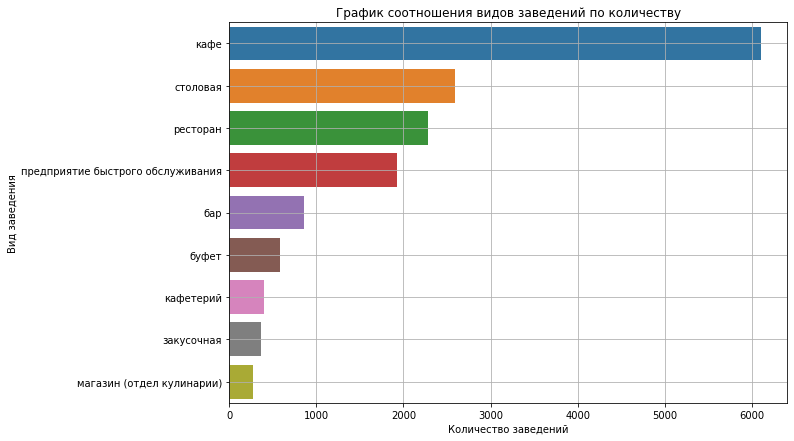

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(y='object_type', x='id', data=rest_type, orient='h')
plt.grid()
plt.title('График соотношения видов заведений по количеству')
plt.xlabel('Количество заведений')
plt.ylabel('Вид заведения')
#fig.savefig('виды по количеству', dpi=300, bbox_inches='tight')

Из выше указанного можно сделать следующие выводы. Наиболее распространенным видом заведения общественного питания является кафе, на втором месте - столовая, замыкает тройку лидеров ресторан. Наименее распространенный вид заведения общественного питания - магазин (отдел кулинарии). 

### <a name="2">2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.</a>

Для анализа соотношения количества сетевых и несетевых завдений сгруппируем данные в зависимости от значений столбца chain: "да" или "нет". 

In [14]:
rest_chain = rest.groupby(by='chain')['id'].count()

Для иллюстрации соотношения построим круговую диаграмму по полученным данным.

Text(0.5, 1.0, 'Соотношение сетевых и несетевых заведений по количеству')

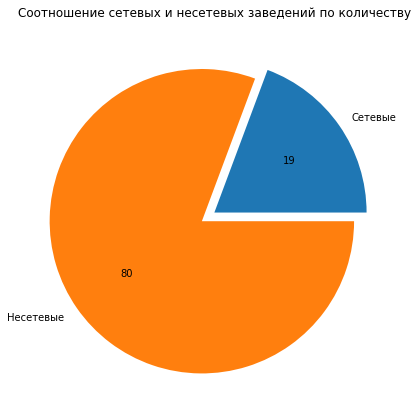

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(rest_chain, autopct='%d', labels=('Сетевые','Несетевые'), explode=(0,0.1))
plt.title('Соотношение сетевых и несетевых заведений по количеству')
#fig.savefig('сетевые и несетевые', dpi=300, bbox_inches='tight')

Из графика видно, что сетевых заведений в 4 раза больше, чем несетевых.  

### <a name="3">2.3. Определение вида объекта общественного питания, для которого характерно сетевое распространение.</a>

Выберем из данных сетевые объекты и подсчитаем количество объектов каждого вида. Построим столбчатый график.

In [16]:
rest_chain_pos = (rest.query('chain == "да"')
    .groupby(by='object_type')['id']
    .count()
    .reset_index()
    .sort_values(by=['id'],ascending=False))
rest_chain_pos.columns = ['object_type','count_chain']

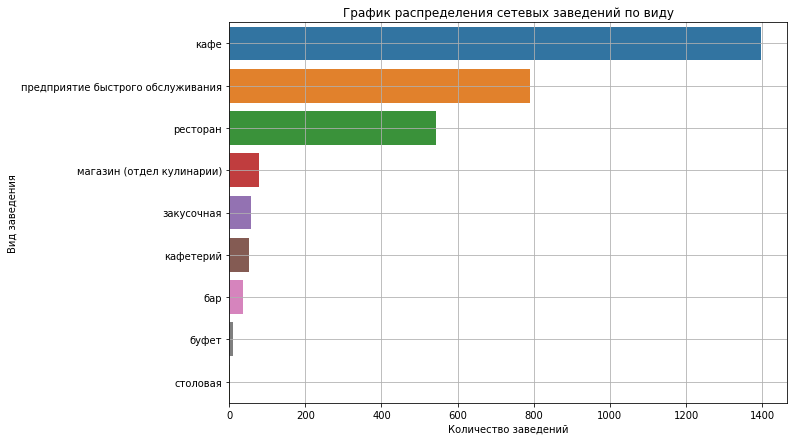

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(y='object_type', x='count_chain',data=rest_chain_pos, orient='h')
plt.title('График распределения сетевых заведений по виду')
plt.xlabel('Количество заведений')
plt.ylabel('Вид заведения')
plt.grid()
#fig.savefig('сетевые по виду', dpi=300, bbox_inches='tight')

Выберем из данных несетевые объекты и подсчитаем количество объектов каждого вида. Построим столбчатый график.

In [18]:
rest_chain_neg = (rest.query('chain == "нет"')
    .groupby(by='object_type')['id']
    .count()
    .reset_index()
    .sort_values(by=['id'],ascending=False))
rest_chain_neg.columns = ['object_type','count_nochain']

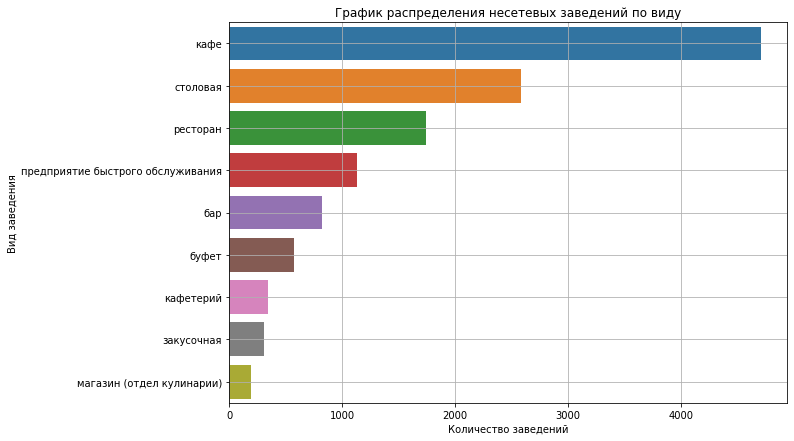

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(y='object_type', x='count_nochain',data=rest_chain_neg, orient='h')
plt.title('График распределения несетевых заведений по виду')
plt.xlabel('Количество заведений')
plt.ylabel('Вид заведения')
plt.grid()
#fig.savefig('несетевые по виду', dpi=300, bbox_inches='tight')

Для большей наглядности построим совместный столбчатый график для количества сетевых и несетевых заведений каждого вида. 

In [20]:
rest_chain_com = rest_chain_pos.merge(rest_chain_neg, on='object_type')
rest_chain_com

,object_type,count_chain,count_nochain
0,кафе,1396,4703
1,предприятие быстрого обслуживания,791,1132
2,ресторан,544,1741
3,магазин (отдел кулинарии),78,195
4,закусочная,56,304
5,кафетерий,52,346
6,бар,37,819
7,буфет,11,574
8,столовая,3,2584


In [21]:
list_type = rest_chain_com['object_type'].tolist()

Text(0.5, 1.0, 'Соотношение сетевых и несетевых заведений по видам')

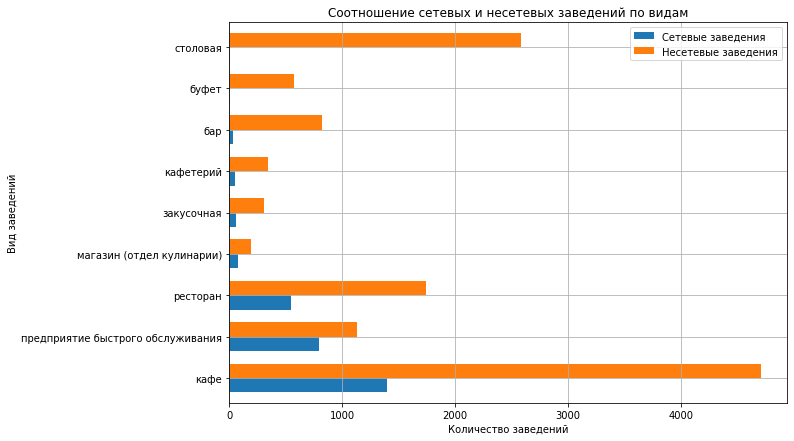

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
list_type = rest_chain_com['object_type'].tolist()
rest_chain_com.plot(kind='barh', width=0.7, ax=ax)
plt.xlabel('Количество заведений')
plt.ylabel('Вид заведений')
plt.grid()
plt.yticks(np.arange(len(list_type)),list_type)
plt.legend(labels=('Сетевые заведения','Несетевые заведения'))
plt.title('Соотношение сетевых и несетевых заведений по видам')
#fig.savefig('совместный', dpi=300, bbox_inches='tight')

Из приведенных графиков можно сделать вывод, что сетевое распространение наиболее характерно для кафе, на втором месте - предприятие быстрого обслуживания, на третьем - ресторан. Столовые и буфеты в сети не объединяют.  

### <a name="4">2.4. Определение характерных черт сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.</a>

Для определения характерных черт сетевых заведений, отфильтруем их по значению "да" столбца chain. Построим для таких заведений гистограмму и точечный график распределения количества посадочных мест.  

In [23]:
rest.query('chain == "да"')['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Text(0.5, 0, 'Количество посадочных мест')

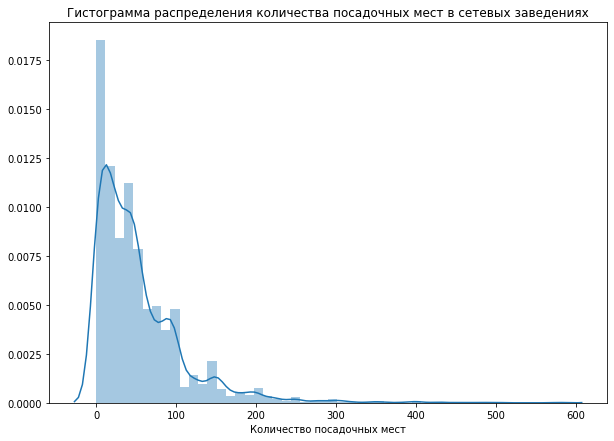

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(rest.query('chain == "да"')['number'])
plt.title('Гистограмма распределения количества посадочных мест в сетевых заведениях')
plt.xlabel('Количество посадочных мест')
#fig.savefig('гистограмма посадочные места', dpi=300, bbox_inches='tight')

Для ответа на вопрос, поставленный в проекте, рассчитаем в сводной таблице среднее количество посадочных мест и количество заведений для каждой сети. 

In [25]:
rest_chain_pivot = (rest.query('chain == "да"')
    .pivot_table(index='object_name', values='number', aggfunc=['count','mean'])
    .reset_index())

In [26]:
rest_chain_pivot.columns = ['object_name','object_count','number_mean']
rest_chain_pivot.sort_values(by='number_mean', ascending=False)

,object_name,object_count,number_mean
651,Темпл Бар,1,356.0
96,БАКИНСКИЙ БУЛЬВАР,1,350.0
689,Чешская пивная «Козловица»,1,306.0
328,Кафе МУ-МУ,1,300.0
714,Ян Примус,1,300.0
...,...,...,...
210,Закусочная «СтардогS»,1,0.0
482,Пицца «Паоло»,1,0.0
92,Американ Сити Пицца ЦЕХ ПО ИЗГОТОВЛЕНИЮ ПИЦЦЫ,1,0.0
413,Магазин готовой еды «Милти»,3,0.0


In [27]:
rest_chain_pivot.describe()

,object_count,number_mean
count,724.000000,724.000000
mean,4.099448,60.320759
std,12.625954,56.132763
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,45.000000
75%,2.000000,83.625000
max,155.000000,356.000000


Рассчитаем долю сетей, включающих в себя по одному заведению с количеством посадочных мест менее 50.

In [28]:
ratio = rest_chain_pivot.query('object_count == 1 & number_mean < 50')['object_count'].count()/len(rest_chain_pivot)
ratio

0.3383977900552486

Из вышеуказанного можно сделать вывод, что в 33 процентах случаев сети состоят из одного заведения с количеством посадочных мест менее 50.  

У меня в query строгое неравенство. По идее сети с двумя объектами в график не попадают))

Построим график совместного распределения среднего количества посадочных мест и количества заведений для сетей, состоящих из трех и более объектов.

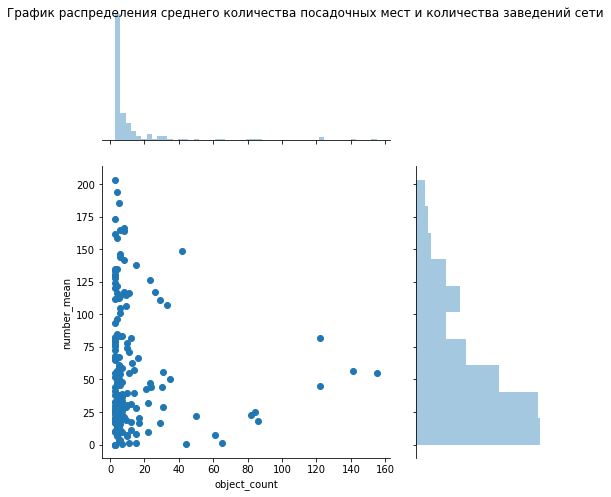

In [29]:
p = (sns.jointplot(x = 'object_count',y = 'number_mean'
    , data = rest_chain_pivot.query('object_count > 2'), height=7, ratio=2))
p.fig.suptitle("График распределения среднего количества посадочных мест и количества заведений сети")
plt.show()

Из построенного графика можно сделать вывод, что среди сетей, с количеством заведений более 2, наиболее характерными являются сети с количеством заведений до 20 и средним количеством посадочных мест до 50. 

### <a name="5">2.5. Определение среднего количества посадочных мест для каждого вида объекта общественного питания. Определение вида объекта общественного питания с наибольшим в среднем количеством посадочных мест. Построение графика.</a>

Посмотрим на распределение значений количества посадочных мест.

In [30]:
rest['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Text(0.5, 0, 'Количество посадочных мест')

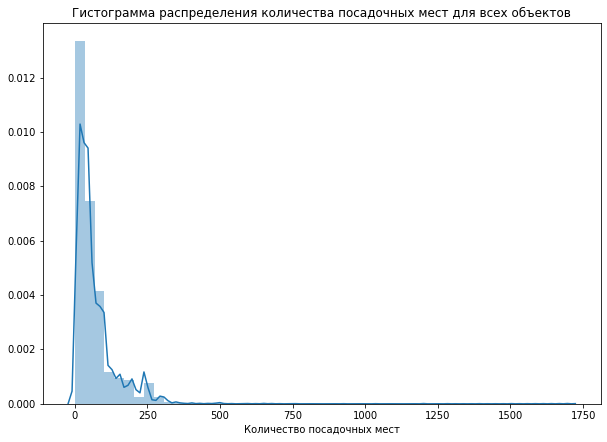

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(rest['number'])
plt.title('Гистограмма распределения количества посадочных мест для всех объектов')
plt.xlabel('Количество посадочных мест')

Среднее количество посадочных мест - 60, медианное - 40. Имеется выброс - 1700 посадочных мест.

По виду гистограммы можно сделать вывод о том, что распределение количества посадочных мест не является нормальным. Кроме того имются выбросы - значения от 300 до 1700. Исходя из этого, для описания среднего значения количества мест используем средние и медианные значения для каждого вида заведения. Рассчитаем в сводной таблице по object_type среднее и медианное количество мест для каждого вида заведений. Построим совместный график для средних и медианных значений. 

In [32]:
mean_median_number = (rest.groupby(by='object_type')['number']
    .agg(['mean','median']).reset_index().sort_values(by='mean'))                    

Text(0.5, 1.0, 'Среднее и медианное количество посадочных мест по видам заведений')

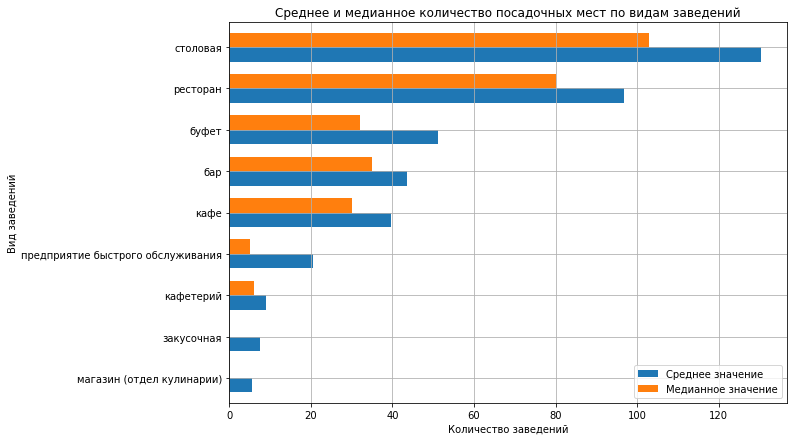

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
list_type = mean_median_number['object_type'].tolist()
mean_median_number.plot(kind='barh', width=0.7, ax=ax)
plt.xlabel('Количество заведений')
plt.ylabel('Вид заведений')
plt.grid()
plt.yticks(np.arange(len(list_type)),list_type)
plt.legend(labels=('Среднее значение','Медианное значение'))
plt.title('Среднее и медианное количество посадочных мест по видам заведений')
#fig.savefig('среднее и медианное', dpi=300, bbox_inches='tight')

Из построенного графика можно сделать вывод, что наибольшее среднее и медианное количество посадочных мест характерно для столовых, наименьшее - для магазинов (отделов кулинарии). 

### <a name="6">2.6. Выделение в отдельный столбец информации об улице из столбца address.</a>

В столбце address анализируемой таблицы находится адрес объекта. После указания города, через запятую следует наименование улицы. Для выделения наименования улицы из адреса объекта, методом split преобразуем строку, содержащуюся в address, в массив данных (разделитель - запятая). Столбцу street таблицы rest_district присвоим значение второго элемента, полученного массива. 

In [35]:
street_type = ['улица', 'проезд','проспект','переулок', 'набережная', 'тупик','площадь', 'шоссе', 'аллея','бульвар', 'спуск']
def get_street(row):
    address = row['address'].split(',')
    parts = len(address) 
    try:
        for item in street_type:
            for i in range(parts):
                if item in address[i]:  
                    return address[i]
    except:
        return 'Error'
    
rest_district['street'] = rest_district.apply(get_street, axis=1)

In [36]:
rest_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15392 entries, 0 to 15391
Data columns (total 8 columns):
id             15392 non-null int64
object_name    15392 non-null object
chain          15392 non-null object
object_type    15392 non-null object
address        15392 non-null object
number         15392 non-null int64
district       15186 non-null object
street         14984 non-null object
dtypes: int64(2), object(6)
memory usage: 962.1+ KB


In [37]:
rest_district.head()

,id,object_name,chain,object_type,address,number,district,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,муниципальный округ Ярославский,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,муниципальный округ Таганский,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,муниципальный округ Таганский,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,муниципальный округ Лианозово,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,муниципальный округ Лианозово,Абрамцевская улица


### <a name="7">2.7. Построение графика топ-10 улиц по количеству объектов общественного питания. Определение района Москвы, с использованием внешней информации, в котором находятся эти улицы.</a>

Сгруппируем данные таблицы rest_district по столбцу street и методом count посчитаем количество заведений, расположенных на какждой улице. Выстроим данные по убыванию количества заведений и передадим переменной top10_streets верхние 10 строк сгруппированных данных. Построим столбчатый график для представления топ-10 улиц по количеству объектов общественного питания.   

In [38]:
top10_streets = (rest_district.groupby(by='street')['id']
    .count()
    .reset_index()
    .sort_values(by='id',ascending=False)
    .head(10))
top10_streets

,street,id
1412,проспект Мира,204
1004,Профсоюзная улица,182
679,Ленинградский проспект,171
989,Пресненская набережная,167
393,Варшавское шоссе,164
682,Ленинский проспект,149
1408,проспект Вернадского,132
669,Кутузовский проспект,114
592,Каширское шоссе,112
599,Кировоградская улица,110


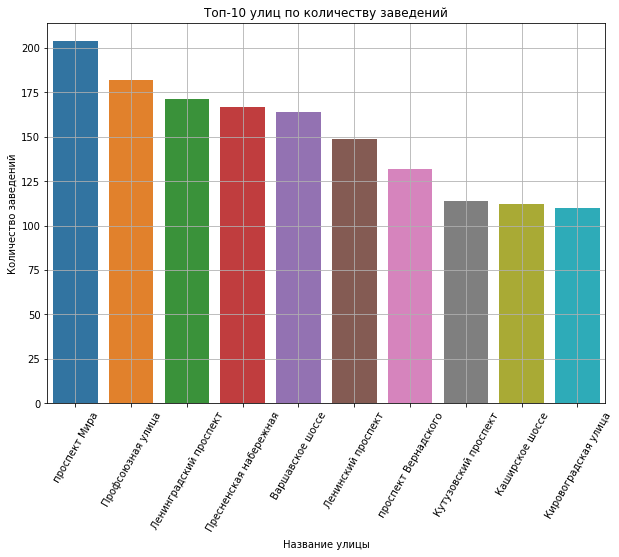

In [39]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='street', y='id', data=top10_streets)
plt.grid()
plt.title('Топ-10 улиц по количеству заведений')
plt.ylabel('Количество заведений')
plt.xlabel('Название улицы')
plt.xticks(rotation=60)
fig.savefig('топ-10 улицы', dpi=300, bbox_inches='tight')

Создадим список топ-10 улиц по количеству заведений. 

In [40]:
list_top10_streets = top10_streets['street']

Для определения районов, в которых находятся топ-10 улиц по количеству заведений общественного питания, отфильтруем улицы, входящие в список list_top10_streets, переменной district_top10street_in передадим данные столбцов street и district, удалим дубликаты и выстроим данные по столбцу street.  

In [41]:
district_top10street_in = (rest_district
    .query('street in @list_top10_streets')[['district','street']]
    .reset_index(drop=True)
    .drop_duplicates()
    .sort_values(by='street')
   )
district_top10street_in

,district,street
0,муниципальный округ Донской,Варшавское шоссе
3,муниципальный округ Нагорный,Варшавское шоссе
5,муниципальный округ Чертаново Южное,Варшавское шоссе
773,городской округ Щербинка,Варшавское шоссе
772,внутригородская территория поселение Воскресен...,Варшавское шоссе
210,муниципальный округ Чертаново Центральное,Варшавское шоссе
651,NaN,Варшавское шоссе
495,муниципальный округ Южное Бутово,Варшавское шоссе
305,муниципальный округ Нагатино-Садовники,Варшавское шоссе
204,муниципальный округ Чертаново Северное,Варшавское шоссе


Из вышеуказанного можно сделать следующий вывод. Улицы, входящие в топ-10 по количеству заведений, имеют большую протяженность и входят в несколько муниципальных районов - до 8 районов в случаях с Ленинским проспектом и Варшавским шоссе.

Узнаем в каких районах находится больше всего заведений общественного питания. Сгруппируем данные по столбцу district, методом count посчитаем количество заведений, выстроим данные по возрастанию количества и передадим переменной 10 верхних строк сгруппированных данных. Построим столбчатый график.

In [42]:
top10_distrits = (rest_district
    .groupby(by='district')['id']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .head(10))
top10_distrits                       

,district,id
0,муниципальный округ Тверской,775
1,муниципальный округ Пресненский,709
2,муниципальный округ Басманный,631
3,муниципальный округ Даниловский,461
4,муниципальный округ Замоскворечье,382
5,муниципальный округ Хамовники,369
6,муниципальный округ Мещанский,358
7,муниципальный округ Таганский,336
8,муниципальный округ Арбат,268
9,муниципальный округ Хорошевский,257


Топ-3 районов с наибольшим количеством заведений общественного питания выглядит следующим образом: округ Тверской - 775 заведений, округ Пресненский - 709, округ Басманный - 631.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

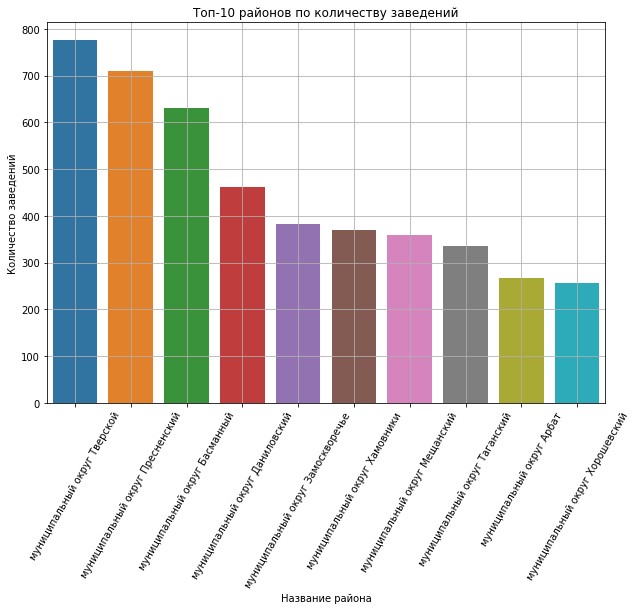

In [43]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='district', y='id', data=top10_distrits)
plt.grid()
plt.title('Топ-10 районов по количеству заведений')
plt.ylabel('Количество заведений')
plt.xlabel('Название района')
plt.xticks(rotation=60)
#fig.savefig('топ-10 районы', dpi=300, bbox_inches='tight')

Посмотрим на улицы, входящие в топ-10 улиц и районов.

In [44]:
list_top10_districts = top10_distrits['district']

In [45]:
rest_district.query('district in @list_top10_districts & street in @list_top10_streets')['street'].drop_duplicates()

682               проспект Мира
3462     Ленинградский проспект
8285     Пресненская набережная
Name: street, dtype: object

### <a name="8">2.8. Определение числа улиц с одним объектом общественного питания. Определение района Москвы, с использованием внешней информации, в котором находятся эти улицы.</a>

Узнаем на каких улицах находится по одному заведению общественного питания. Посчитаем количество заведений на каждой улице и отфильтруем улицы, на которых количество заведений равно 1.

In [46]:
street_1obj = (rest_district.groupby(by='street')['id']
    .count()
    .reset_index()
    .query('id == 1'))
street_1obj.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 2 to 1937
Data columns (total 2 columns):
street    585 non-null object
id        585 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.7+ KB


In [47]:
list_street_1obj = street_1obj['street']

In [48]:
district_str_1obj = (rest_district
    .query('street in @list_street_1obj')[['district','street']]
    .reset_index(drop=True)
    .drop_duplicates()
    .sort_values(by='district')
   )
district_str_1obj.head()

,district,street
451,внутригородская территория поселение Внуковское,улица Корнея Чуковского
61,внутригородская территория поселение Десеновское,Армейская улица
556,внутригородская территория поселение Десеновское,1-я Ватутинская улица
583,внутригородская территория поселение Десеновское,улица Дмитрия Рябинкина
64,внутригородская территория поселение Кленовское,улица 1-й километр Объездной Дороги


In [49]:
district_str_1obj['district'].nunique()

113

Узнаем в каких районах находится самое большое количество улиц с одним заведением общественного питания.

In [50]:
district_str_1obj.groupby(by='district').count().sort_values(by='street', ascending=False)

,street
district,
муниципальный округ Таганский,27
муниципальный округ Хамовники,26
муниципальный округ Басманный,22
муниципальный округ Тверской,20
муниципальный округ Пресненский,19
...,...
муниципальный округ Гагаринский,1
муниципальный округ Восточный,1
муниципальный округ Восточное Измайлово,1


Исходя из изложенного, можно сделать вывод о том, что на территории Москвы имеется 585 улиц, на которых расположено по одному заведению общественного питания. Эти улицы расположены в 113 районах Москвы. Наибольшее количество улиц с одним заведением общественного питания расположено: в Таганском округе – 27 улиц, в округе Хамовники – 26 улиц, в Басманном округе – 22 улицы.

### <a name="9">2.9. Анализ распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей.</a>

Для улиц, входящих в топ-10 по количеству заведений, построим точечный график распределения количества посадочных мест

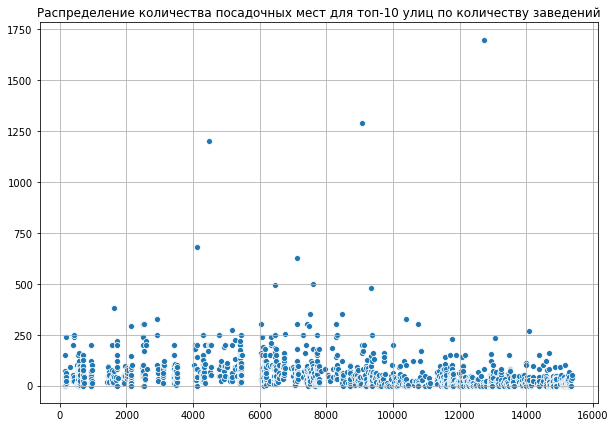

In [51]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=rest_district.query('street in @list_top10_streets')['number'])
plt.title('Распределение количества посадочных мест для топ-10 улиц по количеству заведений')
plt.grid()
#fig.savefig('точечный посадочные места по улицам', dpi=300)

Для выявления закономерностей в распределнии количества посадочных мест в заведениях, расположенных на улицах, входящих в топ-10 по количеству заведений, построим в одних координатах гистограммы распределния количества посадочных мест для этих улиц и для улиц, не входящих в топ-10. Для наглядности графиков отсечем выбросы со значениями более 250 посадочных мест.  

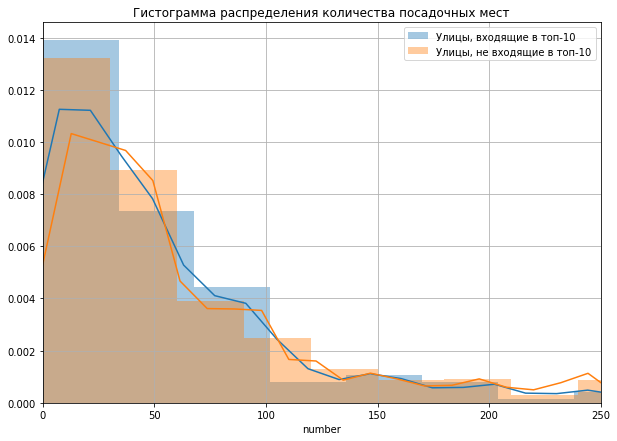

In [52]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(rest_district.query('street in @list_top10_streets')['number'],label='Улицы, входящие в топ-10')
sns.distplot(rest_district.query('street not in @list_top10_streets')['number'], ax=ax, label='Улицы, не входящие в топ-10')
plt.xlim(0, 250)
plt.legend()
plt.grid()
plt.title('Гистограмма распределения количества посадочных мест')
fig.savefig('распределение количества посадочных мест', dpi=300)

Из привиденного графика можно сделать вывод, что распределение количества посадочных мест для улиц из топ-10 выглядит в целом так же как и для улиц, не входящих в топ-10. Но есть и различия. На улицах с большим количеством заведений чаще встречаются заведения с количеством посадочных мест до 30. 

## <a name="30">3. Вывод.</a>

### <a name="31">3.1 Общие выводы</a>

По результатам анализа заведений общественного питания города Москвы можно сделать следующие выводы. Наиболее распространенным видом заведения общественного питания является кафе, на втором месте - столовая, замыкает тройку лидеров ресторан. Наименее распространенный вид заведения общественного питания - магазин (отдел кулинарии). Ссетевых заведений в 4 раза больше, чем несетевых. Сетевое распространение наиболее характерно для кафе, на втором месте - предприятие быстрого обслуживания, на третьем - ресторан. Столовые и буфеты в сети не объединяют. В 43 процентах случаев сети состоят из одного заведения с количеством посадочных мест менее 50. Среди сетей, с количеством заведений более 2, наиболее характерными являются сети с количеством заведений до 20 и средним количеством посадочных мест до 50. Наибольшее среднее и медианное количество посадочных мест характерно для столовых, наименьшее - для магазинов (отделов кулинарии). Улицы, входящие в топ-10 по количеству заведений, имеют большую протяженность и входят в несколько муниципальных районов - до 8 районов в случаях с Ленинским проспектом и Варшавским шоссе. Топ-3 районов с наибольшим количеством заведений общественного питания выглядит следующим образом: округ Тверской - 775 заведений, округ Пресненский - 709, округ Басманный - 631. На территории Москвы имеется 585 улиц, на которых расположено по одному заведению общественного питания. Эти улицы расположены в 113 районах Москвы. Наибольшее количество улиц с одним заведением общественного питания расположено: в Таганском округе – 27 улиц, в округе Хамовники – 26 улиц, в Басманном округе – 22 улицы. На улицах с большим количеством заведений чаще встречаются заведения с количеством посадочных мест до 30.

### <a name="32">3.2 Рекомендации</a>

Основываясь на вышеуказанном, в качестве характеристик для вновь открываемого заведения общественного питания можно порекомендовать следующее: вид завдения - кафе; на первом этапе - один объект, далее возможно создание сети; количетво посадочных мест - до 30; расположение - Тверской, Пресненский, Таганский районы, так как эти рйоны входят одновременно в топы по количеству заведений и по количеству улиц с одним заведением, то есть при наличии большого количества потенциальных клиентов, посещающих рекомендуемые районы, можно расположить объект на улице с небольшим количеством заведений-конкурентов. 

### <a name=20>4. Презентация результатов анализа.</a>

Ссылка на презентацию результатов анализа <https://yadi.sk/i/ckGCz_Hskaj1Vg>